## <u>Music Recommendation System Using Python<u>

### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#### Read dataset

In [2]:
df = pd.read_csv("spotify_millsongdata.csv")

#### Initial understanding

In [3]:
df.shape

(57650, 4)

In [4]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [5]:
df.tail()

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [7]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [8]:
# Top artist
top_artist = df["artist"].value_counts().head(10)
print("\nTop 10 artists:")
print(top_artist)


Top 10 artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [9]:
# Create sample data for fast processing and drop link column because it is no use in music recommendation

df = df.sample(10000)

df = df.drop("link",axis=1).reset_index(drop=True)

In [10]:
df.head()

,artist,song,text
0,"Harry Connick, Jr.",Santa Claus,I think I saw ol' santa through my window chri...
1,Young Jeezy,Hustlaz Ambition,Everybody wanna be like me? \r\nY'all can be ...
2,Rush,The Enemy Within,Things crawl in the darkness \r\nThat imagina...
3,Chris Brown,Go Away,(Verse 1) \r\nBaby close your eyes and just ...
4,Louis Armstrong,Papa De Da Da,Papa de da da \r\nHe's a lady's man \r\nPapa...


In [11]:
# wordcloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width = 800, height= 400, background_color = 'black').generate(all_lyrics)

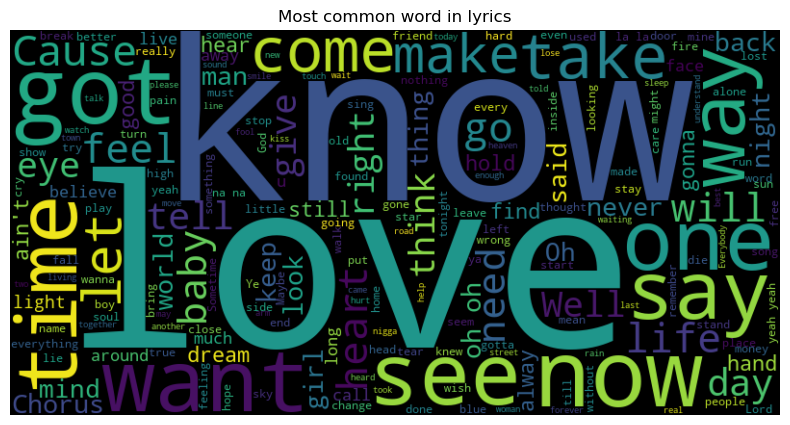

In [12]:
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("Off")
plt.title("Most common word in lyrics")
plt.show()
          

### <u>Data Preprocessing<u>

In [13]:
# Download nltk data

# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('stopwords')

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [16]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]","",text) #remove special character and numbers
    text = text.lower() #convert into lower form
    tokens = word_tokenize(text) # tokenize and remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)
    
    

In [17]:
# Apply preprocess_text to lyrics

df['Cleaned_text'] = df['text'].apply(preprocess_text)

In [18]:
df.head()

,artist,song,text,Cleaned_text
0,"Harry Connick, Jr.",Santa Claus,I think I saw ol' santa through my window chri...,think saw ol santa window christmas eve eyes r...
1,Young Jeezy,Hustlaz Ambition,Everybody wanna be like me? \r\nY'all can be ...,everybody wan na like yall like look watch loo...
2,Rush,The Enemy Within,Things crawl in the darkness \r\nThat imagina...,things crawl darkness imagination spins needle...
3,Chris Brown,Go Away,(Verse 1) \r\nBaby close your eyes and just ...,verse baby close eyes take hand put trust hear...
4,Louis Armstrong,Papa De Da Da,Papa de da da \r\nHe's a lady's man \r\nPapa...,papa de da da hes ladys man papa de da da swee...


#### <u>Vectorization with TF-IDF<u>

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_text'])

#### <u> Compute cosine similarity<u>

In [20]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [21]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [24]:
df["song"][3]

'Go Away'

In [25]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
               artist                                 song
5736    Conway Twitty                   First Things First
5170    Kirk Franklin                           First Love
8982    One Direction                      Loved You First
4289   George Michael  The First Time Ever I Saw Your Face
6939  The Temptations  The First Time Ever I Saw Your Face
